# Tarea 3 - Parte 2

Escriba una clase con las siguientes funcionalidades:
1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas
2. Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables.
3. Implemente un método que entregue los nombre de las variables disponibles.
4. Implemente un método que reciba el nombre de una variable disponible dentro del objeto ( en el  dataframe) y regrese: sus estadísticas básicas:  media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

# Solución

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [107]:
class DatasetAnalyzer:
    def __init__(self, filename):
        self.dataframe = pd.read_csv(filename)

    def calculate_descriptive_stats(self):
        return self.dataframe.describe()

    def get_variable_names(self):
        return list(self.dataframe.columns)

    def analyze_variable(self, variable_name, hist=True):
        variable_data = self.dataframe[variable_name]

        statistics = pd.Series({
            'mean': variable_data.mean(),
            'median': variable_data.median(),
            'std': variable_data.std(),
            'q25': variable_data.quantile(0.25),
            'q50': variable_data.quantile(0.50),
            'q75': variable_data.quantile(0.75)
        })
        
        if hist is True:
            #Con seaborn
            sns.set()
            #fig = sns.histplot(x=variable_data, element="step", stat="density", color="blue", alpha=0.5, bins=20)
            sns.displot(x=variable_data, kde=True, element="step", stat="density", color="blue", alpha=0.7, bins=20)
            
            # Con metodo hist() de pandas
            #variable_data.hist(bins=20)
            #plt.xlabel(variable_name)
            #plt.ylabel('Frequency')
            #plt.title('Histogram of {}'.format(variable_name))
            #plt.show()
            
            # Con Plotly
            #histograma = px.histogram(variable_data, nbins=20, title='Histograma',color_discrete_sequence=['#F2AB6D'], histnorm='probability density')
            # configuramos las etiquetas de los ejes
            #histograma.update_layout(xaxis_title=variable_name, yaxis_title="Densidad", width=800, height=600) # bargap=0.2
            #histograma.show()
        
        return(statistics)

## Ejemplo

In [108]:
# Ejemplo de uso
dataset = DatasetAnalyzer('iris.csv')

# Calcular estadísticas descriptivas básicas
descriptive_stats = dataset.calculate_descriptive_stats()
descriptive_stats

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
# Obtener los nombres de las variables disponibles
variable_names = dataset.get_variable_names()
variable_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

mean      5.843333
median    5.800000
std       0.828066
q25       5.100000
q50       5.800000
q75       6.400000
dtype: float64

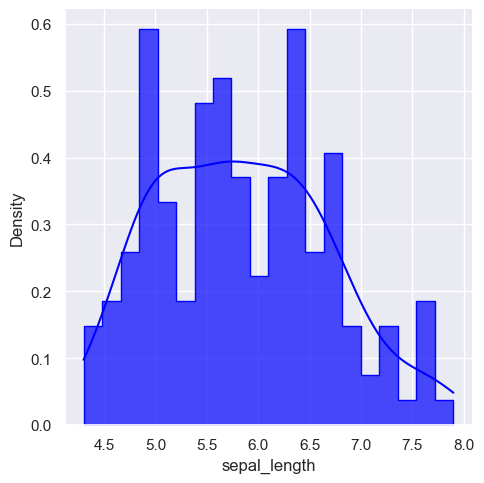

In [110]:
# Analizar una variable específica (por ejemplo, 'sepal_length')
variable_statistics = dataset.analyze_variable('sepal_length', hist=True)
variable_statistics

# Funcion propia de Estadisticas Descriptivas

In [114]:
pd.options.display.float_format = '{:,.2f}'.format # Configuramos separadores de miles y 2 decimales

In [115]:
def summary(y,include='numeric'):
    def numer(x):
        x2 = x.dropna()
        a = x.isna().sum()
        b = x2.mean()
        c = x2.std()
        d = c/b
        e = x2.skew()
        f = x2.kurt()
        g = x2.min()
        h = np.quantile(x2,0.25)
        i = x2.median()
        j = np.quantile(x2,0.75)
        k = x2.max()
        l = pd.Series({"Missings":a,"Mean":b,"St.dev":c,"Coef.var":d,"Skewness":e,
                       "Kurtosis":f,"Min":g,"%25":h,"Median":i,"%75":j,"Max":k})
        return(l)
    
    if include == 'numeric': 
        numerics = y.select_dtypes(include='number')
        if len(numerics.columns) > 0: return(numerics.apply(numer)) 
        else: print('Error. There are not numeric-type columns!!')
        
    if include == 'object':    
        objects = y.select_dtypes(include='object')
        if len(objects.columns) > 0: return(objects.describe(include="object"))
        else: print('Error. There are not object-type columns!!')

In [116]:
summary(iris)

,sepal_length,sepal_width,petal_length,petal_width
Missings,0.00,0.00,0.00,0.00
Mean,5.84,3.06,3.76,1.20
St.dev,0.83,0.44,1.77,0.76
Coef.var,0.14,0.14,0.47,0.64
Skewness,0.31,0.32,-0.27,-0.10
Kurtosis,-0.55,0.23,-1.40,-1.34
Min,4.30,2.00,1.00,0.10
%25,5.10,2.80,1.60,0.30
Median,5.80,3.00,4.35,1.30
%75,6.40,3.30,5.10,1.80


<AxesSubplot:ylabel='Frequency'>

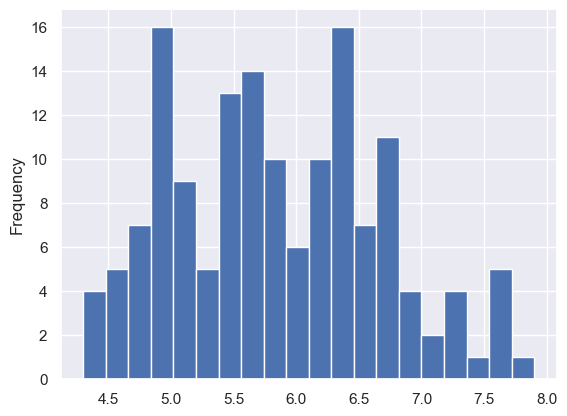

In [117]:
iris = sns.load_dataset("iris") # tipo dataframe pandas
iris.sepal_length.plot.hist(bins = 20) # no se puede tener la densidad